<a href="https://www.kaggle.com/code/aneevinay/student-scores-analysis?scriptVersionId=228932535" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction: Student Marks Analysis

In this project, I analyze student performance using a dataset sourced from Kaggle. The dataset contains academic records of 250 students, including their marks in Science, English, History, and Maths.

## Objectives:

✔️ Calculate the total and average marks for each student.  
✔️ Identify the top-performing student across all sections.  
✔️ Find the top student in each section based on total marks.  
✔️ Compare student performance across different sections.  

This analysis will help understand overall student performance, identify trends, and highlight top achievers. 

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# About Dataset

In [2]:
df = pd.read_csv("/kaggle/input/student-scores/student_scores.csv")
df.head()

,id,Name,Gender,Age,Section,Science,English,History,Maths
0,1,Bronnie,Female,13,C,21,81,62,49
1,2,Lemmie,Male,15,B,29,41,17,40
2,3,Danya,Female,14,C,12,87,16,96
3,4,Denna,Female,14,B,15,53,82,33
4,5,Jocelin,Male,14,A,43,6,3,21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       250 non-null    int64 
 1   Name     250 non-null    object
 2   Gender   250 non-null    object
 3   Age      250 non-null    int64 
 4   Section  250 non-null    object
 5   Science  250 non-null    int64 
 6   English  250 non-null    int64 
 7   History  250 non-null    int64 
 8   Maths    250 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 17.7+ KB


## Dataset Overview

>* Rows: 250 (each row represents a student)
>* Columns: 9 
>  
## Categories:

> Student Info: id, Name, Gender, Age, Section   
> Subjects & Scores: Science, English, History, Maths

## Checking for missing values

In [4]:
df.isnull().sum()

id         0
Name       0
Gender     0
Age        0
Section    0
Science    0
English    0
History    0
Maths      0
dtype: int64

> There is no missing values in the dataset

## Checking for Duplicates

In [5]:
df.duplicated().sum()

0

> There is no duplicates in the dataset

# descriptive anlysis

In [6]:
df.describe()

,id,Age,Science,English,History,Maths
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,14.020000,51.440000,47.980000,52.272000,53.016000
std,72.312977,0.823598,29.314497,29.949013,26.868526,27.386416
min,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000
25%,63.250000,13.000000,25.250000,20.250000,31.000000,30.000000
50%,125.500000,14.000000,53.000000,47.500000,53.000000,52.500000
75%,187.750000,15.000000,78.000000,74.000000,76.000000,76.000000
max,250.000000,15.000000,100.000000,100.000000,100.000000,100.000000


## Key Insights

1. Performance Trends

>* The average scores for subjects are around 50%.
>* History has the highest average (52.27), while English has the lowest (47.98).

2. Score Distribution

>* The standard deviation shows high variability in scores, meaning some students scored very high while others scored very low.
>* Some students have perfect scores (100%), while others have very low scores (1%) in each subject.

3. Subject Difficulty

>* Since English has the lowest average score (47.98), it might be the most challenging subject for students.  
>* Science and Maths have slightly higher scores, indicating a better overall performance in these subjects.

4. Age & Performance

>* Students are between 13 to 15 years old, with most being 14 years old (median age).


# Feature Engineering

## Add total and average Columns

In [7]:
df['total']=df["Science"]+df['English']+df['History']+df["Maths"]
df['average']=df['total']/4
df.head()

,id,Name,Gender,Age,Section,Science,English,History,Maths,total,average
0,1,Bronnie,Female,13,C,21,81,62,49,213,53.25
1,2,Lemmie,Male,15,B,29,41,17,40,127,31.75
2,3,Danya,Female,14,C,12,87,16,96,211,52.75
3,4,Denna,Female,14,B,15,53,82,33,183,45.75
4,5,Jocelin,Male,14,A,43,6,3,21,73,18.25


# Data Analysis

In [8]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'Section', 'Science', 'English',
       'History', 'Maths', 'total', 'average'],
      dtype='object')

## Top Student Overall (Highest Total Marks)

In [9]:
top_student = df.loc[df['total'].idxmax()]
top_student

id            11
Name        Dunn
Gender      Male
Age           15
Section        C
Science      100
English       93
History       87
Maths         81
total        361
average    90.25
Name: 10, dtype: object

> **Dunn (ID 11, Section C)** achieved the highest total marks (361) with an impressive average of 90.25%. He scored a perfect 100 in Science and also performed well in English (93) and History (87).

## Top Scorer in Each Section

In [10]:
top_per_section = df.loc[df.groupby("Section")["total"].idxmax()]
top_per_section

,id,Name,Gender,Age,Section,Science,English,History,Maths,total,average
120,121,Patrizia,Male,13,A,79,88,96,93,356,89.00
200,201,Ruddie,Female,15,B,84,97,88,64,333,83.25
10,11,Dunn,Male,15,C,100,93,87,81,361,90.25


### Insights:

>* **Dunn (Section C)** is the overall top scorer with 361 marks (90.25%).
>* **Patrizia (Section A)** is the best in Section A with 356 marks (89.00%).
>* **Ruddie (Section B)** leads Section B with 333 marks (83.25%).

## The Best Performer in Each Subject

In [11]:
# Best in science
best_science = df.loc[df['Science'].idxmax(), ['Name', 'Science','Section']]
best_science

Name       Dunn
Science     100
Section       C
Name: 10, dtype: object

> **Dunn**(section C) is best in science 100 out of 100

In [12]:
# best in english
best_english = df.loc[df['English'].idxmax(), ['Name', 'English','Section']]
best_english

Name       Brandise
English         100
Section           A
Name: 122, dtype: object

> **Brandise**(Section A) is best in english with full score

In [13]:
# best in History
best_History = df.loc[df['History'].idxmax(), ['Name', 'History','Section']]
best_History

Name       Drusi
History      100
Section        C
Name: 67, dtype: object

> **Drusi**(Section C) is best in History with full marks

In [14]:
# best in maths
best_maths = df.loc[df['Maths'].idxmax(), ['Name', 'Maths','Section']]
best_maths

Name       David
Maths        100
Section        B
Name: 76, dtype: object

> **David**(Section B) is best in maths with full marks

# Data Visualization

## Distribution of student average scores

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


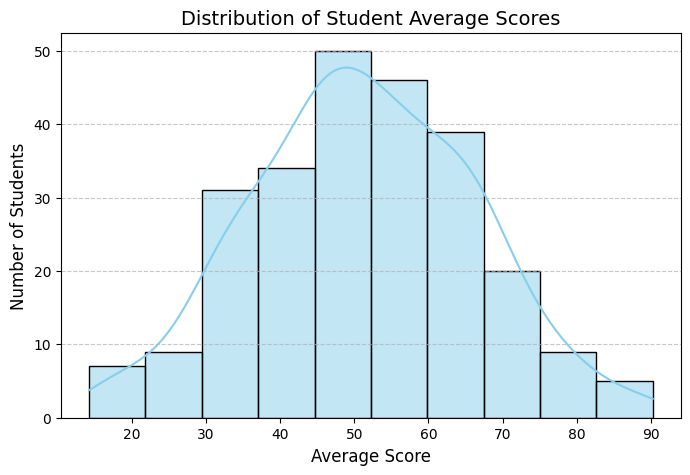

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['average'], bins=10, kde=True, color="skyblue")

# Customize the chart
plt.title("Distribution of Student Average Scores", fontsize=14)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

plt.savefig('Distribution_of_student_average_scores.png')

 > normal distribution where most students have scores around 50-60, with fewer students at the extremes.

## Average marks in different sections

In [16]:
# Group by Section and calculate mean average marks
section_avg = df.groupby("Section")["average"].mean()
section_avg

Section
A    52.063291
B    52.490506
C    49.288043
Name: average, dtype: float64

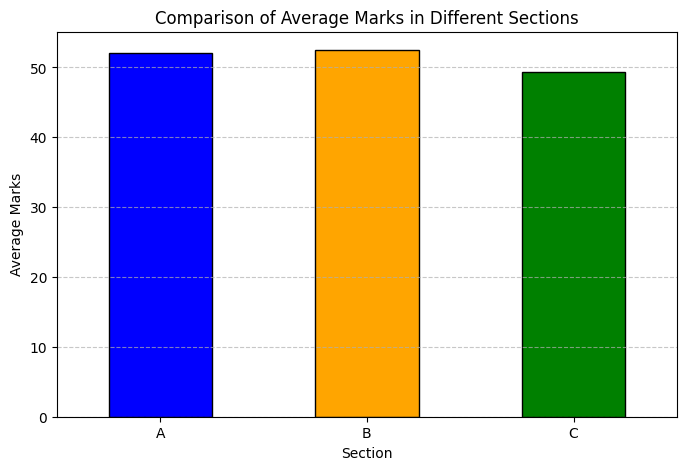

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(8, 5))
section_avg.plot(kind="bar", color=["blue", "orange", "green"], edgecolor="black")

plt.xlabel("Section")
plt.ylabel("Average Marks")
plt.title("Comparison of Average Marks in Different Sections")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

plt.savefig('Comparison_of_marks_in_different_sections.png')

> Students in Section B performed slightly better on average than those in Sections A and C. 

## Subject-Wise Marks Distribution

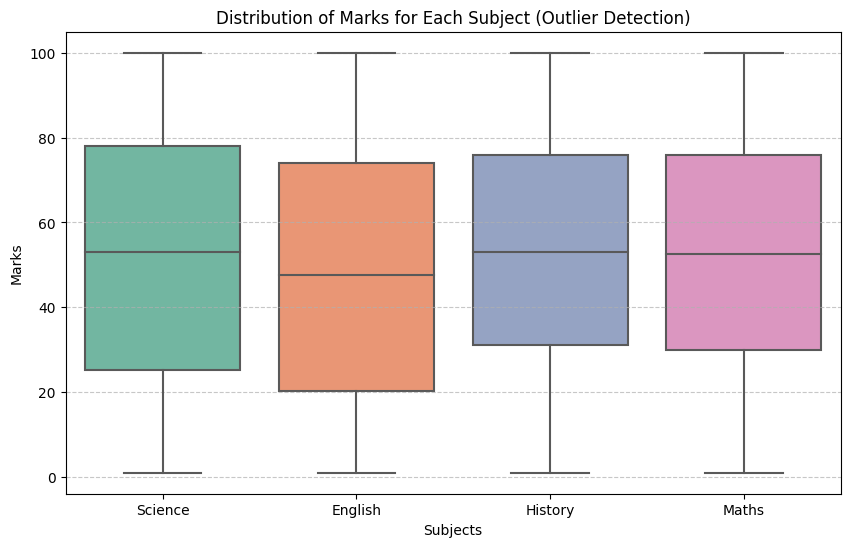

<Figure size 640x480 with 0 Axes>

In [18]:
# Selecting only subject columns
subjects = ["Science", "English", "History", "Maths"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[subjects], palette="Set2")

plt.xlabel("Subjects")
plt.ylabel("Marks")
plt.title("Distribution of Marks for Each Subject (Outlier Detection)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

plt.savefig('outlier_detection.png')

> The box plot confirms that while most students perform within a standard range, some students excel while others struggle in certain subjects.

## Correlation Analysis

In [19]:
# Compute the correlation matrix
corr_matrix = df[['Science', 'English', 'History', 'Maths']].corr()
corr_matrix

,Science,English,History,Maths
Science,1.000000,0.060406,0.070778,0.006004
English,0.060406,1.000000,-0.081998,0.088029
History,0.070778,-0.081998,1.000000,0.070144
Maths,0.006004,0.088029,0.070144,1.000000


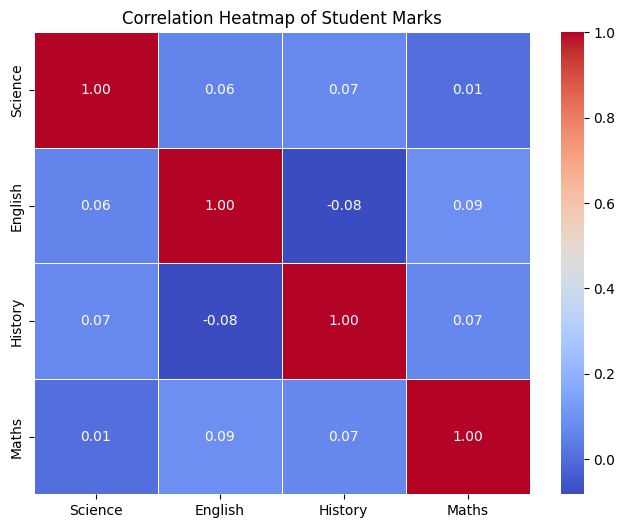

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Student Marks")
plt.show()

plt.savefig('Correlation_heatmap.png')

>* Each subject's performance is independent, meaning students do not necessarily excel in multiple subjects.
>* English & History show a slight inverse relationship, which could mean different skill sets are required for them.
>* Maths & Science have no significant relationship, which is an unusual finding.
>* Students who perform well in Science tend to have slightly better scores in History.

 # Conclusion for Student Marks Analysis

## Overall Top Scorer

The highest-scoring student is **Dunn (Section C)** with a total score of 361 and an average of 90.25%. Dunn performed exceptionally well across all subjects.

## Top Student in Each Section

* **Dunn (Section C)** – 361 marks (90.25%) → Overall Top Scorer  
* **Patrizia (Section A)** – 356 marks (89.00%) → Top in Section A  
* **Ruddie (Section B)** – 333 marks (83.25%) → Top in Section B  

## Top Scorer in Each Subject

**Subject**	- **Top Scorer** - **Section** - **Score**   

Science - **Dunn**	   - C - 100/100   
English - **Brandise** - A - 100/100   
History - **Drusi**	   - C - 100/100  
Maths	- **David**    - B - 100/100  

# Key Takeaways

* Dunn (Section C) is the overall top performer, leading in Science.
* Each section has strong students, with Section A and C showing competitive scores.
* Four students achieved full marks in their respective subjects, proving excellence in Science, English, History, and Maths.

This analysis provides valuable insights into student performance across subjects and sections. The data highlights top performers, section-wise trends, and subject relationships.

>* The weak correlation between subjects suggests each subject requires different skill sets, and students may excel in one while struggling in another.
>* The distribution of marks shows varying performance levels, indicating a need for targeted interventions for struggling students.
>* The presence of full marks in multiple subjects shows some students achieve mastery, while others struggle, emphasizing the need for personalized learning strategies.